In [1]:
#https://www.datatechnotes.com/2019/12/multi-output-regression-example-with.html

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Combined_Izmir_full.csv')
#df = pd.read_csv('Combined_Izmir_non-binary.csv')

df.head(5)

,Floor_Area,Floor_Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,schedule_recorded,Window_Count,w_north,w_north-east,...,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west,Cooling,Heating,Lighting,Equipment
0,50.33,5,0.114,0.114,0.057,0,0,4,0,0,...,0,0,0,0,1,1,53.25,37.55,7.56,2.38
1,61.50,3,0.102,0.102,0.051,1,2,3,0,1,...,0,0,0,0,1,1,21.82,23.23,7.02,2.38
2,77.37,2,0.048,0.048,0.024,0,0,4,0,1,...,1,0,0,0,0,0,31.13,30.83,11.55,2.38
3,150.28,4,0.051,0.051,0.026,0,2,5,0,1,...,1,1,1,0,0,1,56.48,62.20,6.83,2.38
4,105.60,1,0.048,0.048,0.024,0,2,3,0,0,...,1,1,0,0,1,1,50.08,23.49,7.05,2.38


In [3]:
# Convert to numpy 
X = df.columns.drop('Cooling').drop('Heating').drop('Lighting').drop('Equipment')
#X = df.columns.drop('Cooling').drop('Heating').drop('Lighting')

In [4]:
from numpy import vstack
y1 = df.Cooling.values.reshape(2023,1)
y2 = df.Heating.values.reshape(2023,1)
y3 = df.Lighting.values.reshape(2023,1)
#y3 = df.ofPeople_bedroom
Y = hstack((y1,y2,y3))
#Y = hstack((y1,y2))
X = df[X].values

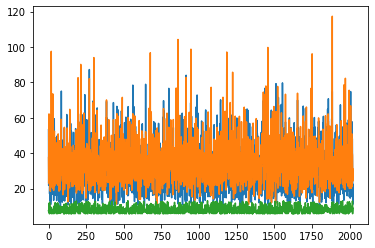

In [5]:
#plt.plot(y1)
#plt.plot(y2)
plt.plot(Y)
plt.show()

In [6]:
print("X:", X.shape, "Y:", Y.shape)

X: (2023, 25) Y: (2023, 3)


In [114]:
from sklearn import preprocessing
from numpy.random import seed

min_max_scaler = preprocessing.MinMaxScaler() 
X = min_max_scaler.fit_transform(X)
Y = min_max_scaler.fit_transform(Y)
#7
seed = 1
np.random.seed(seed)

X_train, X_val_and_test, Y_train, Y_val_and_test=train_test_split(X, Y, test_size=0.1, random_state=seed)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=seed)

In [137]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers, optimizers
from keras.initializers import normal

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

#initializer = normal(mean=1, stddev=0.01, seed=13)

model = Sequential()
model.add(Dense(200, input_dim=X.shape[1], activation="relu", 
                kernel_initializer='random_uniform'))
#model.add(Dense(100, input_dim=X.shape[1], activation="relu", kernel_initializer='random_normal'))
#model.add(Dense(100, input_dim=X.shape[1], activation="relu", kernel_initializer=initializer))
model.add(Dense(200, input_dim=X.shape[1], activation="relu", 
                kernel_regularizer=regularizers.l2(0.001),kernel_initializer='random_uniform'))
model.add(Dense(200, input_dim=X.shape[1], activation="relu",
                kernel_regularizer=regularizers.l2(0.001), kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(200, input_dim=X.shape[1], activation="relu",
                kernel_regularizer=regularizers.l2(0.001), kernel_initializer='random_uniform'))
model.add(Dense(Y.shape[1]))
model.compile(loss="mse", optimizer="adam", metrics=['accuracy', 'mse'])
 
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 200)               5200      
_________________________________________________________________
dense_171 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_172 (Dense)            (None, 200)               40200     
_________________________________________________________________
dropout_38 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_173 (Dense)            (None, 3)                 603       
Total params: 86,203
Trainable params: 86,203
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.fit(X_train, Y_train, epochs=200, batch_size=32, verbose=1, validation_data=(X_val, Y_val))

Train on 1820 samples, validate on 101 samples
Epoch 1/500
1820/1820 [==============================] - 0s 182us/step - loss: 0.0647 - accuracy: 0.5016 - mse: 0.0371 - val_loss: 0.0308 - val_accuracy: 0.6040 - val_mse: 0.0214
Epoch 2/500
1820/1820 [==============================] - 0s 80us/step - loss: 0.0321 - accuracy: 0.6286 - mse: 0.0253 - val_loss: 0.0249 - val_accuracy: 0.5644 - val_mse: 0.0199
Epoch 3/500
1820/1820 [==============================] - 0s 77us/step - loss: 0.0269 - accuracy: 0.6445 - mse: 0.0228 - val_loss: 0.0212 - val_accuracy: 0.6337 - val_mse: 0.0177
Epoch 4/500
1820/1820 [==============================] - 0s 78us/step - loss: 0.0251 - accuracy: 0.6577 - mse: 0.0219 - val_loss: 0.0212 - val_accuracy: 0.6436 - val_mse: 0.0183
Epoch 5/500
1820/1820 [==============================] - 0s 80us/step - loss: 0.0238 - accuracy: 0.6714 - mse: 0.0210 - val_loss: 0.0209 - val_accuracy: 0.6337 - val_mse: 0.0182
Epoch 6/500
1820/1820 [==============================] - 0s 77

1820/1820 [==============================] - 0s 81us/step - loss: 0.0124 - accuracy: 0.7786 - mse: 0.0095 - val_loss: 0.0144 - val_accuracy: 0.7525 - val_mse: 0.0115
Epoch 47/500
1820/1820 [==============================] - 0s 95us/step - loss: 0.0121 - accuracy: 0.7879 - mse: 0.0092 - val_loss: 0.0144 - val_accuracy: 0.7327 - val_mse: 0.0115
Epoch 48/500
1820/1820 [==============================] - 0s 89us/step - loss: 0.0121 - accuracy: 0.7912 - mse: 0.0092 - val_loss: 0.0137 - val_accuracy: 0.7426 - val_mse: 0.0109
Epoch 49/500
1820/1820 [==============================] - 0s 92us/step - loss: 0.0118 - accuracy: 0.7879 - mse: 0.0089 - val_loss: 0.0136 - val_accuracy: 0.7624 - val_mse: 0.0107
Epoch 50/500
1820/1820 [==============================] - 0s 89us/step - loss: 0.0120 - accuracy: 0.7813 - mse: 0.0091 - val_loss: 0.0155 - val_accuracy: 0.7426 - val_mse: 0.0126
Epoch 51/500
1820/1820 [==============================] - 0s 89us/step - loss: 0.0119 - accuracy: 0.7841 - mse: 0.0091

Epoch 92/500
1820/1820 [==============================] - 0s 86us/step - loss: 0.0090 - accuracy: 0.8126 - mse: 0.0068 - val_loss: 0.0136 - val_accuracy: 0.7822 - val_mse: 0.0113
Epoch 93/500
1820/1820 [==============================] - 0s 87us/step - loss: 0.0097 - accuracy: 0.8066 - mse: 0.0074 - val_loss: 0.0127 - val_accuracy: 0.7624 - val_mse: 0.0105
Epoch 94/500
1820/1820 [==============================] - 0s 82us/step - loss: 0.0089 - accuracy: 0.8121 - mse: 0.0067 - val_loss: 0.0124 - val_accuracy: 0.7723 - val_mse: 0.0102
Epoch 95/500
1820/1820 [==============================] - 0s 79us/step - loss: 0.0086 - accuracy: 0.8187 - mse: 0.0064 - val_loss: 0.0129 - val_accuracy: 0.7822 - val_mse: 0.0107
Epoch 96/500
1820/1820 [==============================] - 0s 86us/step - loss: 0.0089 - accuracy: 0.8225 - mse: 0.0067 - val_loss: 0.0125 - val_accuracy: 0.7822 - val_mse: 0.0103
Epoch 97/500
1820/1820 [==============================] - 0s 84us/step - loss: 0.0088 - accuracy: 0.8143 

1820/1820 [==============================] - 0s 78us/step - loss: 0.0074 - accuracy: 0.8214 - mse: 0.0056 - val_loss: 0.0125 - val_accuracy: 0.8020 - val_mse: 0.0107
Epoch 138/500
1820/1820 [==============================] - 0s 78us/step - loss: 0.0073 - accuracy: 0.8352 - mse: 0.0055 - val_loss: 0.0128 - val_accuracy: 0.7921 - val_mse: 0.0110
Epoch 139/500
1820/1820 [==============================] - 0s 82us/step - loss: 0.0076 - accuracy: 0.8352 - mse: 0.0058 - val_loss: 0.0121 - val_accuracy: 0.7921 - val_mse: 0.0104
Epoch 140/500
1820/1820 [==============================] - 0s 81us/step - loss: 0.0073 - accuracy: 0.8352 - mse: 0.0055 - val_loss: 0.0132 - val_accuracy: 0.8119 - val_mse: 0.0114
Epoch 141/500
1820/1820 [==============================] - 0s 82us/step - loss: 0.0075 - accuracy: 0.8368 - mse: 0.0057 - val_loss: 0.0133 - val_accuracy: 0.8218 - val_mse: 0.0114
Epoch 142/500
1820/1820 [==============================] - 0s 79us/step - loss: 0.0075 - accuracy: 0.8341 - mse: 0

1820/1820 [==============================] - 0s 72us/step - loss: 0.0066 - accuracy: 0.8363 - mse: 0.0050 - val_loss: 0.0126 - val_accuracy: 0.8317 - val_mse: 0.0110
Epoch 183/500
1820/1820 [==============================] - 0s 73us/step - loss: 0.0067 - accuracy: 0.8319 - mse: 0.0052 - val_loss: 0.0127 - val_accuracy: 0.8119 - val_mse: 0.0111
Epoch 184/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0069 - accuracy: 0.8418 - mse: 0.0053 - val_loss: 0.0126 - val_accuracy: 0.8218 - val_mse: 0.0110
Epoch 185/500
1820/1820 [==============================] - 0s 74us/step - loss: 0.0066 - accuracy: 0.8379 - mse: 0.0050 - val_loss: 0.0130 - val_accuracy: 0.7921 - val_mse: 0.0114
Epoch 186/500
1820/1820 [==============================] - 0s 73us/step - loss: 0.0067 - accuracy: 0.8319 - mse: 0.0052 - val_loss: 0.0125 - val_accuracy: 0.8416 - val_mse: 0.0110
Epoch 187/500
1820/1820 [==============================] - 0s 71us/step - loss: 0.0065 - accuracy: 0.8451 - mse: 0

1820/1820 [==============================] - 0s 72us/step - loss: 0.0061 - accuracy: 0.8500 - mse: 0.0046 - val_loss: 0.0129 - val_accuracy: 0.8020 - val_mse: 0.0114
Epoch 228/500
1820/1820 [==============================] - 0s 71us/step - loss: 0.0059 - accuracy: 0.8473 - mse: 0.0044 - val_loss: 0.0135 - val_accuracy: 0.7822 - val_mse: 0.0121
Epoch 229/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0061 - accuracy: 0.8407 - mse: 0.0047 - val_loss: 0.0128 - val_accuracy: 0.8119 - val_mse: 0.0113
Epoch 230/500
1820/1820 [==============================] - 0s 73us/step - loss: 0.0063 - accuracy: 0.8352 - mse: 0.0048 - val_loss: 0.0131 - val_accuracy: 0.7921 - val_mse: 0.0116
Epoch 231/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0060 - accuracy: 0.8456 - mse: 0.0046 - val_loss: 0.0132 - val_accuracy: 0.7723 - val_mse: 0.0118
Epoch 232/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0060 - accuracy: 0.8357 - mse: 0

1820/1820 [==============================] - 0s 72us/step - loss: 0.0056 - accuracy: 0.8516 - mse: 0.0042 - val_loss: 0.0137 - val_accuracy: 0.7525 - val_mse: 0.0124
Epoch 273/500
1820/1820 [==============================] - 0s 71us/step - loss: 0.0057 - accuracy: 0.8549 - mse: 0.0043 - val_loss: 0.0130 - val_accuracy: 0.7822 - val_mse: 0.0117
Epoch 274/500
1820/1820 [==============================] - 0s 73us/step - loss: 0.0056 - accuracy: 0.8577 - mse: 0.0043 - val_loss: 0.0131 - val_accuracy: 0.7921 - val_mse: 0.0117
Epoch 275/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0055 - accuracy: 0.8604 - mse: 0.0041 - val_loss: 0.0132 - val_accuracy: 0.8020 - val_mse: 0.0119
Epoch 276/500
1820/1820 [==============================] - 0s 71us/step - loss: 0.0056 - accuracy: 0.8582 - mse: 0.0043 - val_loss: 0.0123 - val_accuracy: 0.7921 - val_mse: 0.0110
Epoch 277/500
1820/1820 [==============================] - 0s 71us/step - loss: 0.0057 - accuracy: 0.8505 - mse: 0

1820/1820 [==============================] - 0s 84us/step - loss: 0.0054 - accuracy: 0.8560 - mse: 0.0041 - val_loss: 0.0144 - val_accuracy: 0.7723 - val_mse: 0.0132
Epoch 318/500
1820/1820 [==============================] - 0s 77us/step - loss: 0.0061 - accuracy: 0.8522 - mse: 0.0048 - val_loss: 0.0130 - val_accuracy: 0.7624 - val_mse: 0.0117
Epoch 319/500
1820/1820 [==============================] - 0s 77us/step - loss: 0.0057 - accuracy: 0.8593 - mse: 0.0044 - val_loss: 0.0125 - val_accuracy: 0.7723 - val_mse: 0.0112
Epoch 320/500
1820/1820 [==============================] - 0s 74us/step - loss: 0.0053 - accuracy: 0.8560 - mse: 0.0040 - val_loss: 0.0128 - val_accuracy: 0.7624 - val_mse: 0.0116
Epoch 321/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0053 - accuracy: 0.8632 - mse: 0.0040 - val_loss: 0.0131 - val_accuracy: 0.7723 - val_mse: 0.0118
Epoch 322/500
1820/1820 [==============================] - 0s 71us/step - loss: 0.0052 - accuracy: 0.8604 - mse: 0

1820/1820 [==============================] - 0s 86us/step - loss: 0.0055 - accuracy: 0.8615 - mse: 0.0043 - val_loss: 0.0124 - val_accuracy: 0.8020 - val_mse: 0.0112
Epoch 363/500
1820/1820 [==============================] - 0s 96us/step - loss: 0.0053 - accuracy: 0.8549 - mse: 0.0041 - val_loss: 0.0142 - val_accuracy: 0.7822 - val_mse: 0.0130
Epoch 364/500
1820/1820 [==============================] - 0s 93us/step - loss: 0.0054 - accuracy: 0.8434 - mse: 0.0042 - val_loss: 0.0132 - val_accuracy: 0.7921 - val_mse: 0.0120
Epoch 365/500
1820/1820 [==============================] - 0s 92us/step - loss: 0.0050 - accuracy: 0.8588 - mse: 0.0038 - val_loss: 0.0136 - val_accuracy: 0.8020 - val_mse: 0.0124
Epoch 366/500
1820/1820 [==============================] - 0s 87us/step - loss: 0.0049 - accuracy: 0.8549 - mse: 0.0038 - val_loss: 0.0124 - val_accuracy: 0.7921 - val_mse: 0.0112
Epoch 367/500
1820/1820 [==============================] - 0s 85us/step - loss: 0.0049 - accuracy: 0.8560 - mse: 0

1820/1820 [==============================] - 0s 83us/step - loss: 0.0049 - accuracy: 0.8643 - mse: 0.0038 - val_loss: 0.0142 - val_accuracy: 0.7723 - val_mse: 0.0131
Epoch 408/500
1820/1820 [==============================] - 0s 87us/step - loss: 0.0049 - accuracy: 0.8549 - mse: 0.0038 - val_loss: 0.0144 - val_accuracy: 0.7723 - val_mse: 0.0132
Epoch 409/500
1820/1820 [==============================] - 0s 78us/step - loss: 0.0050 - accuracy: 0.8637 - mse: 0.0039 - val_loss: 0.0163 - val_accuracy: 0.7525 - val_mse: 0.0152
Epoch 410/500
1820/1820 [==============================] - 0s 79us/step - loss: 0.0051 - accuracy: 0.8610 - mse: 0.0040 - val_loss: 0.0136 - val_accuracy: 0.7822 - val_mse: 0.0124
Epoch 411/500
1820/1820 [==============================] - 0s 78us/step - loss: 0.0048 - accuracy: 0.8643 - mse: 0.0036 - val_loss: 0.0158 - val_accuracy: 0.7228 - val_mse: 0.0147
Epoch 412/500
1820/1820 [==============================] - 0s 81us/step - loss: 0.0056 - accuracy: 0.8489 - mse: 0

1820/1820 [==============================] - 0s 74us/step - loss: 0.0045 - accuracy: 0.8643 - mse: 0.0034 - val_loss: 0.0137 - val_accuracy: 0.7921 - val_mse: 0.0126
Epoch 453/500
1820/1820 [==============================] - 0s 75us/step - loss: 0.0047 - accuracy: 0.8731 - mse: 0.0036 - val_loss: 0.0142 - val_accuracy: 0.7525 - val_mse: 0.0131
Epoch 454/500
1820/1820 [==============================] - 0s 73us/step - loss: 0.0045 - accuracy: 0.8665 - mse: 0.0035 - val_loss: 0.0132 - val_accuracy: 0.7921 - val_mse: 0.0122
Epoch 455/500
1820/1820 [==============================] - 0s 74us/step - loss: 0.0046 - accuracy: 0.8582 - mse: 0.0035 - val_loss: 0.0136 - val_accuracy: 0.7723 - val_mse: 0.0126
Epoch 456/500
1820/1820 [==============================] - 0s 72us/step - loss: 0.0047 - accuracy: 0.8742 - mse: 0.0036 - val_loss: 0.0144 - val_accuracy: 0.7525 - val_mse: 0.0133
Epoch 457/500
1820/1820 [==============================] - 0s 75us/step - loss: 0.0047 - accuracy: 0.8659 - mse: 0

1820/1820 [==============================] - 0s 72us/step - loss: 0.0047 - accuracy: 0.8555 - mse: 0.0037 - val_loss: 0.0134 - val_accuracy: 0.8020 - val_mse: 0.0123
Epoch 498/500
1820/1820 [==============================] - 0s 76us/step - loss: 0.0048 - accuracy: 0.8648 - mse: 0.0038 - val_loss: 0.0136 - val_accuracy: 0.7921 - val_mse: 0.0126
Epoch 499/500
1820/1820 [==============================] - 0s 73us/step - loss: 0.0048 - accuracy: 0.8577 - mse: 0.0037 - val_loss: 0.0138 - val_accuracy: 0.7327 - val_mse: 0.0128
Epoch 500/500
1820/1820 [==============================] - 0s 76us/step - loss: 0.0046 - accuracy: 0.8736 - mse: 0.0036 - val_loss: 0.0142 - val_accuracy: 0.7426 - val_mse: 0.0132


In [139]:
from sklearn import metrics

ypred = model.predict(X_test)
print("y1 MAE:%.4f" % metrics.mean_absolute_error(Y_test[:,0], ypred[:,0])) 
print("y2 MAE:%.4f" % metrics.mean_absolute_error(Y_test[:,1], ypred[:,1]))
print("y3 MAE:%.4f" % metrics.mean_absolute_error(Y_test[:,2], ypred[:,2]))

print("y1 r2:%.4f" % metrics.r2_score(Y_test[:,0], ypred[:,0])) 
print("y2 r2:%.4f" % metrics.r2_score(Y_test[:,1], ypred[:,1]))
print("y3 r2:%.4f" % metrics.r2_score(Y_test[:,2], ypred[:,2]))

print("y1 RMSE:%.4f" % np.sqrt(metrics.mean_squared_error(Y_test[:,0], ypred[:,0]))) 
print("y2 RMSE:%.4f" % np.sqrt(metrics.mean_squared_error(Y_test[:,1], ypred[:,1]))) 
print("y3 RMSE:%.4f" % np.sqrt(metrics.mean_squared_error(Y_test[:,2], ypred[:,2]))) 

y1 MAE:0.0731
y2 MAE:0.0516
y3 MAE:0.1199
y1 r2:0.6730
y2 r2:0.7388
y3 r2:0.1904
y1 RMSE:0.0977
y2 RMSE:0.0689
y3 RMSE:0.1693


In [92]:
#np.savetxt('array.csv', np.column_stack((ytest, ypred)))

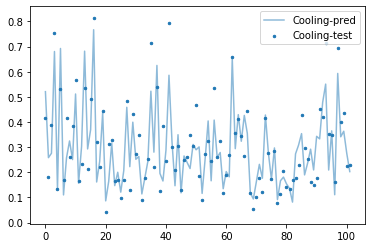

<Figure size 3600x1800 with 0 Axes>

In [136]:
x_ax = range(len(X_test))
plt.scatter(x_ax, Y_test[:,0],  s=6, label="Cooling-test")
plt.plot(x_ax, ypred[:,0], label="Cooling-pred", alpha=0.50)
#plt.scatter(x_ax, Y_test[:,1],  s=6, label="Heating-test", c='red')
#plt.plot(x_ax, ypred[:,1], label="Heating-pred", c='red', alpha=0.50)
#plt.scatter(x_ax, Y_test[:,2],  s=6, label="Lighting-test", c='orange')
#plt.plot(x_ax, ypred[:,2], label="Lighting-pred", c='orange', alpha=0.50)
plt.legend()
plt.figure(dpi=300, figsize=(12,6))
plt.show()

In [139]:
#TODO apply record to csv to compare test and pred values
# apply train test division
# apply multiple metrics
# apply train-val graphic how they are developing